# Import Librayes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
zd = pd.read_csv('Zoo.csv')
zd

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zd.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
zd.shape

(101, 18)

In [5]:
zd.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# visualizations

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1400x1200 with 0 Axes>

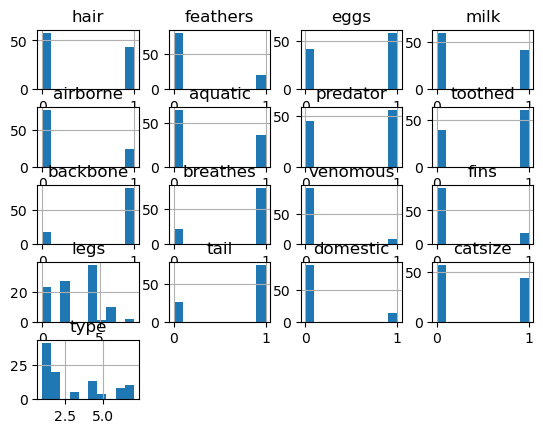

In [7]:
plt.figure(figsize=(14,12))
plt.tight_layout()
zd.hist()

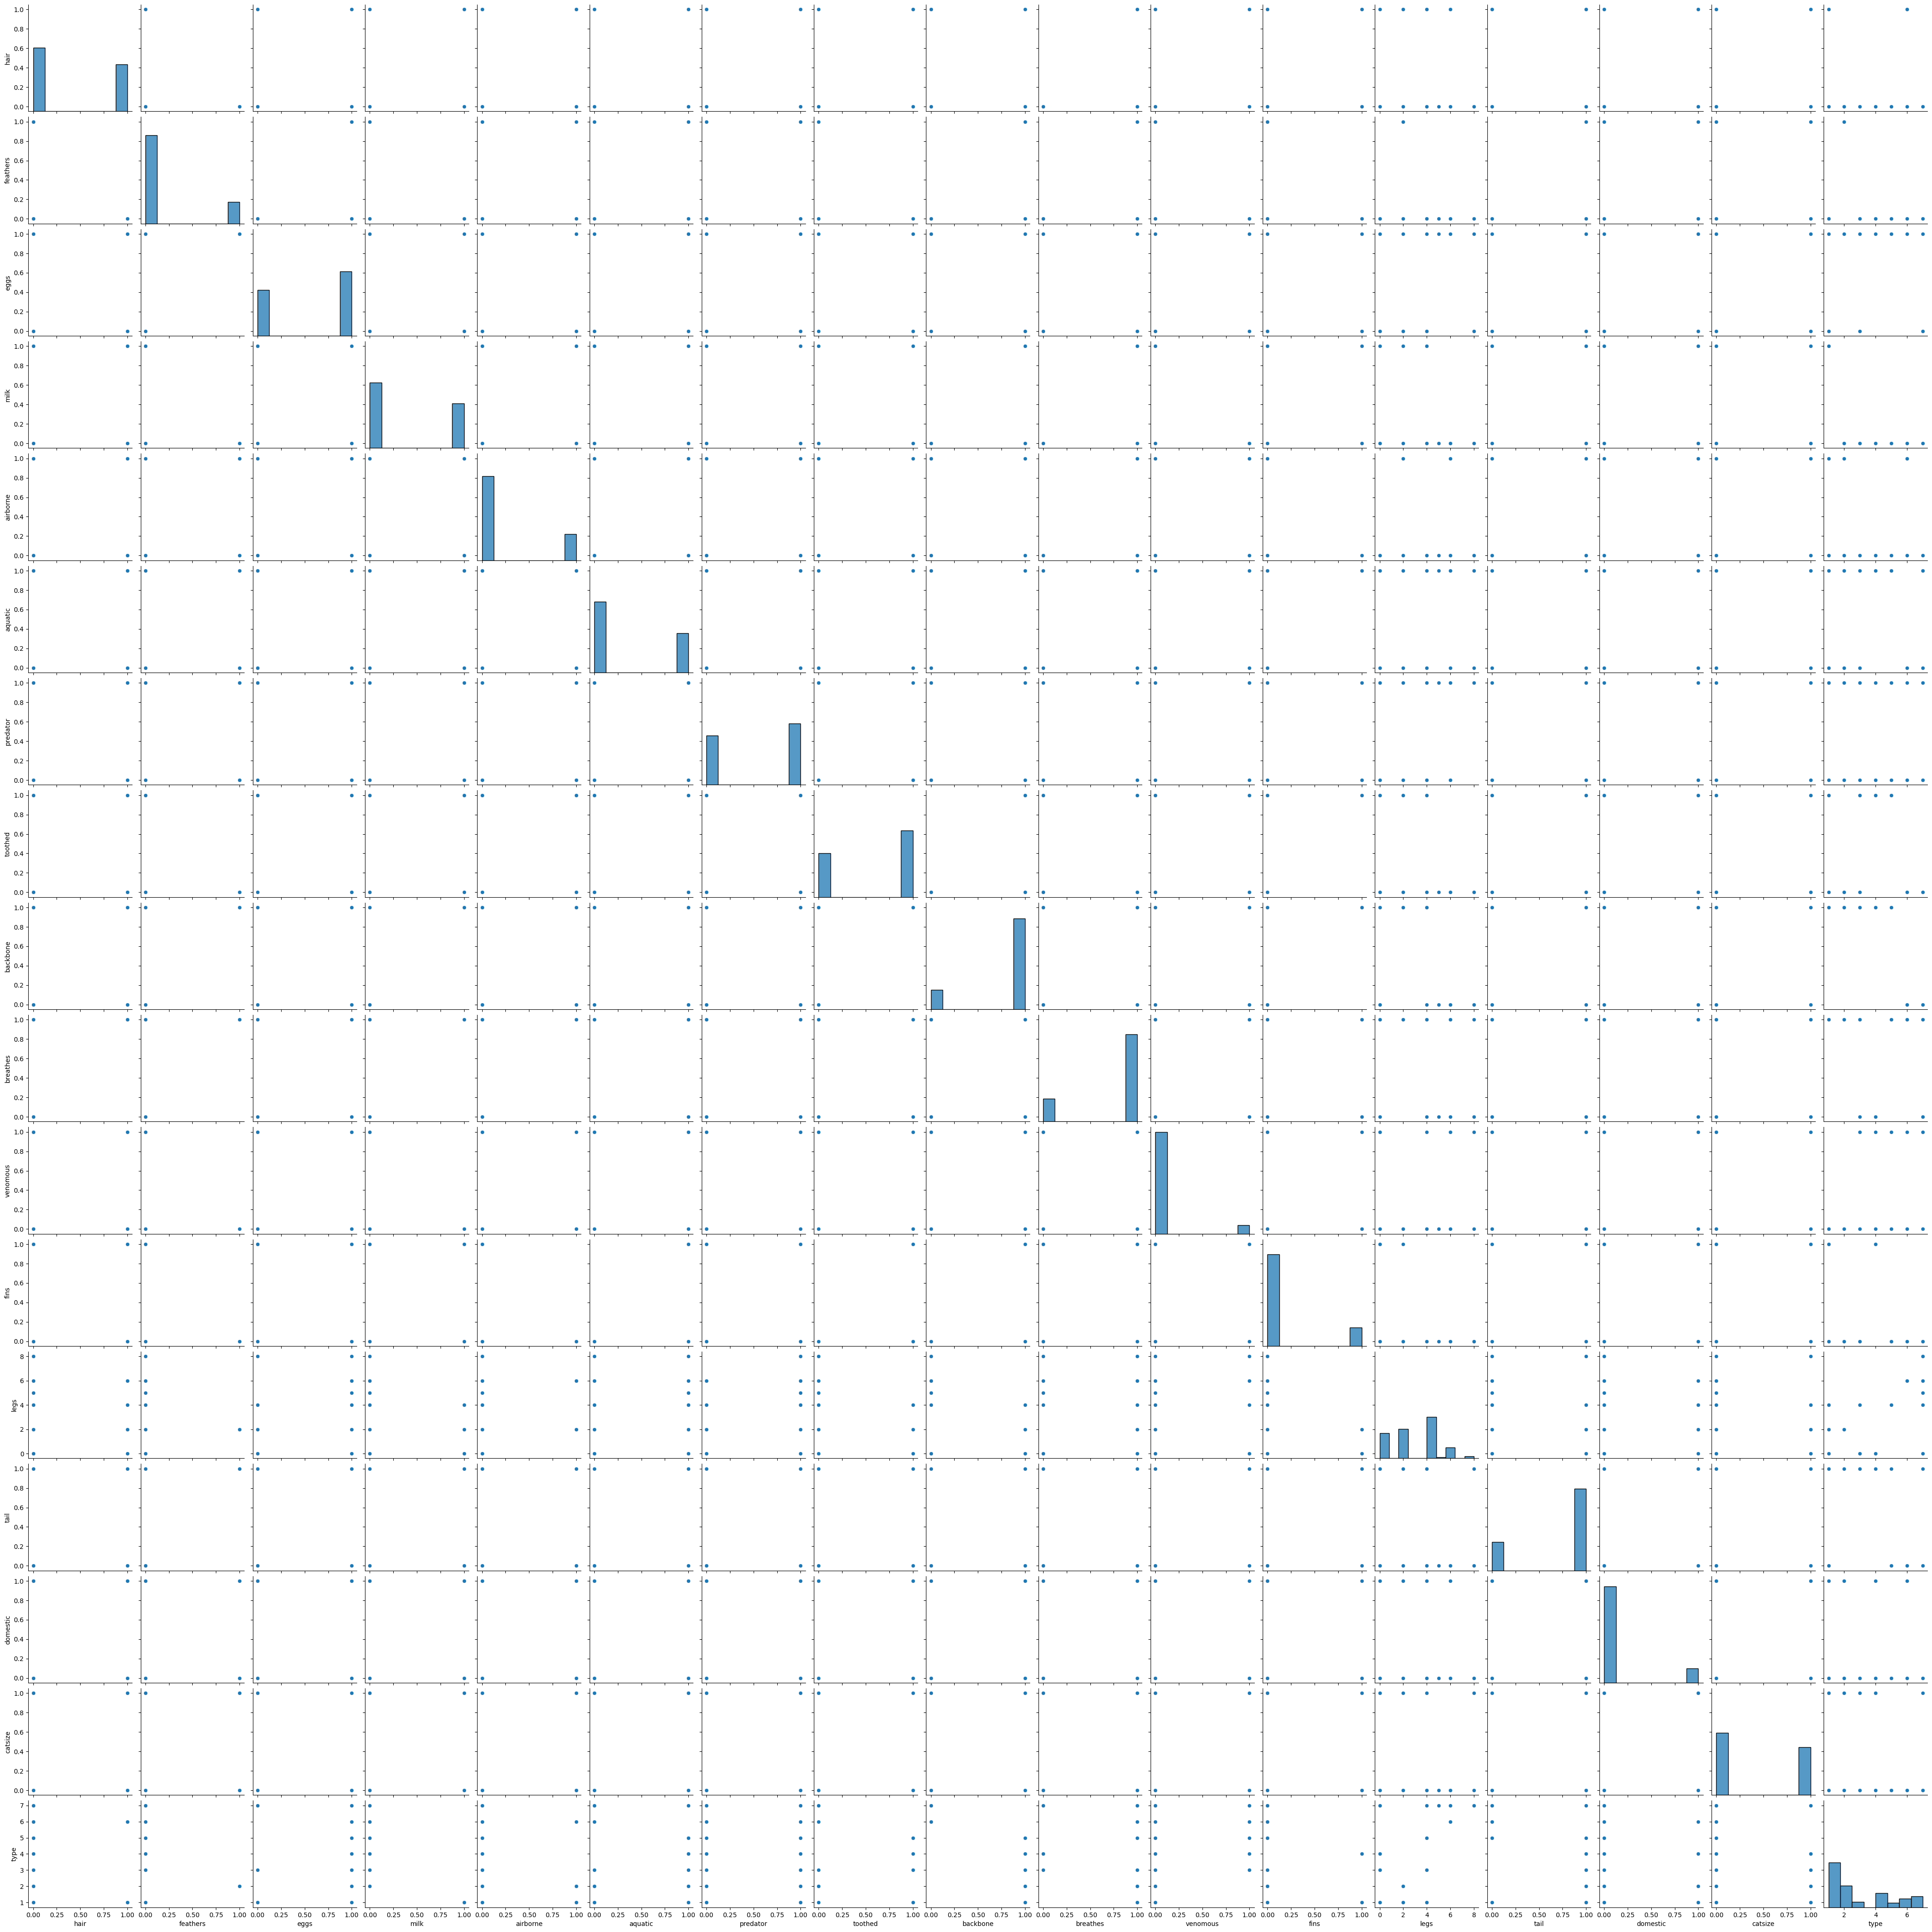

In [8]:
sns.pairplot(zd)
plt.show()

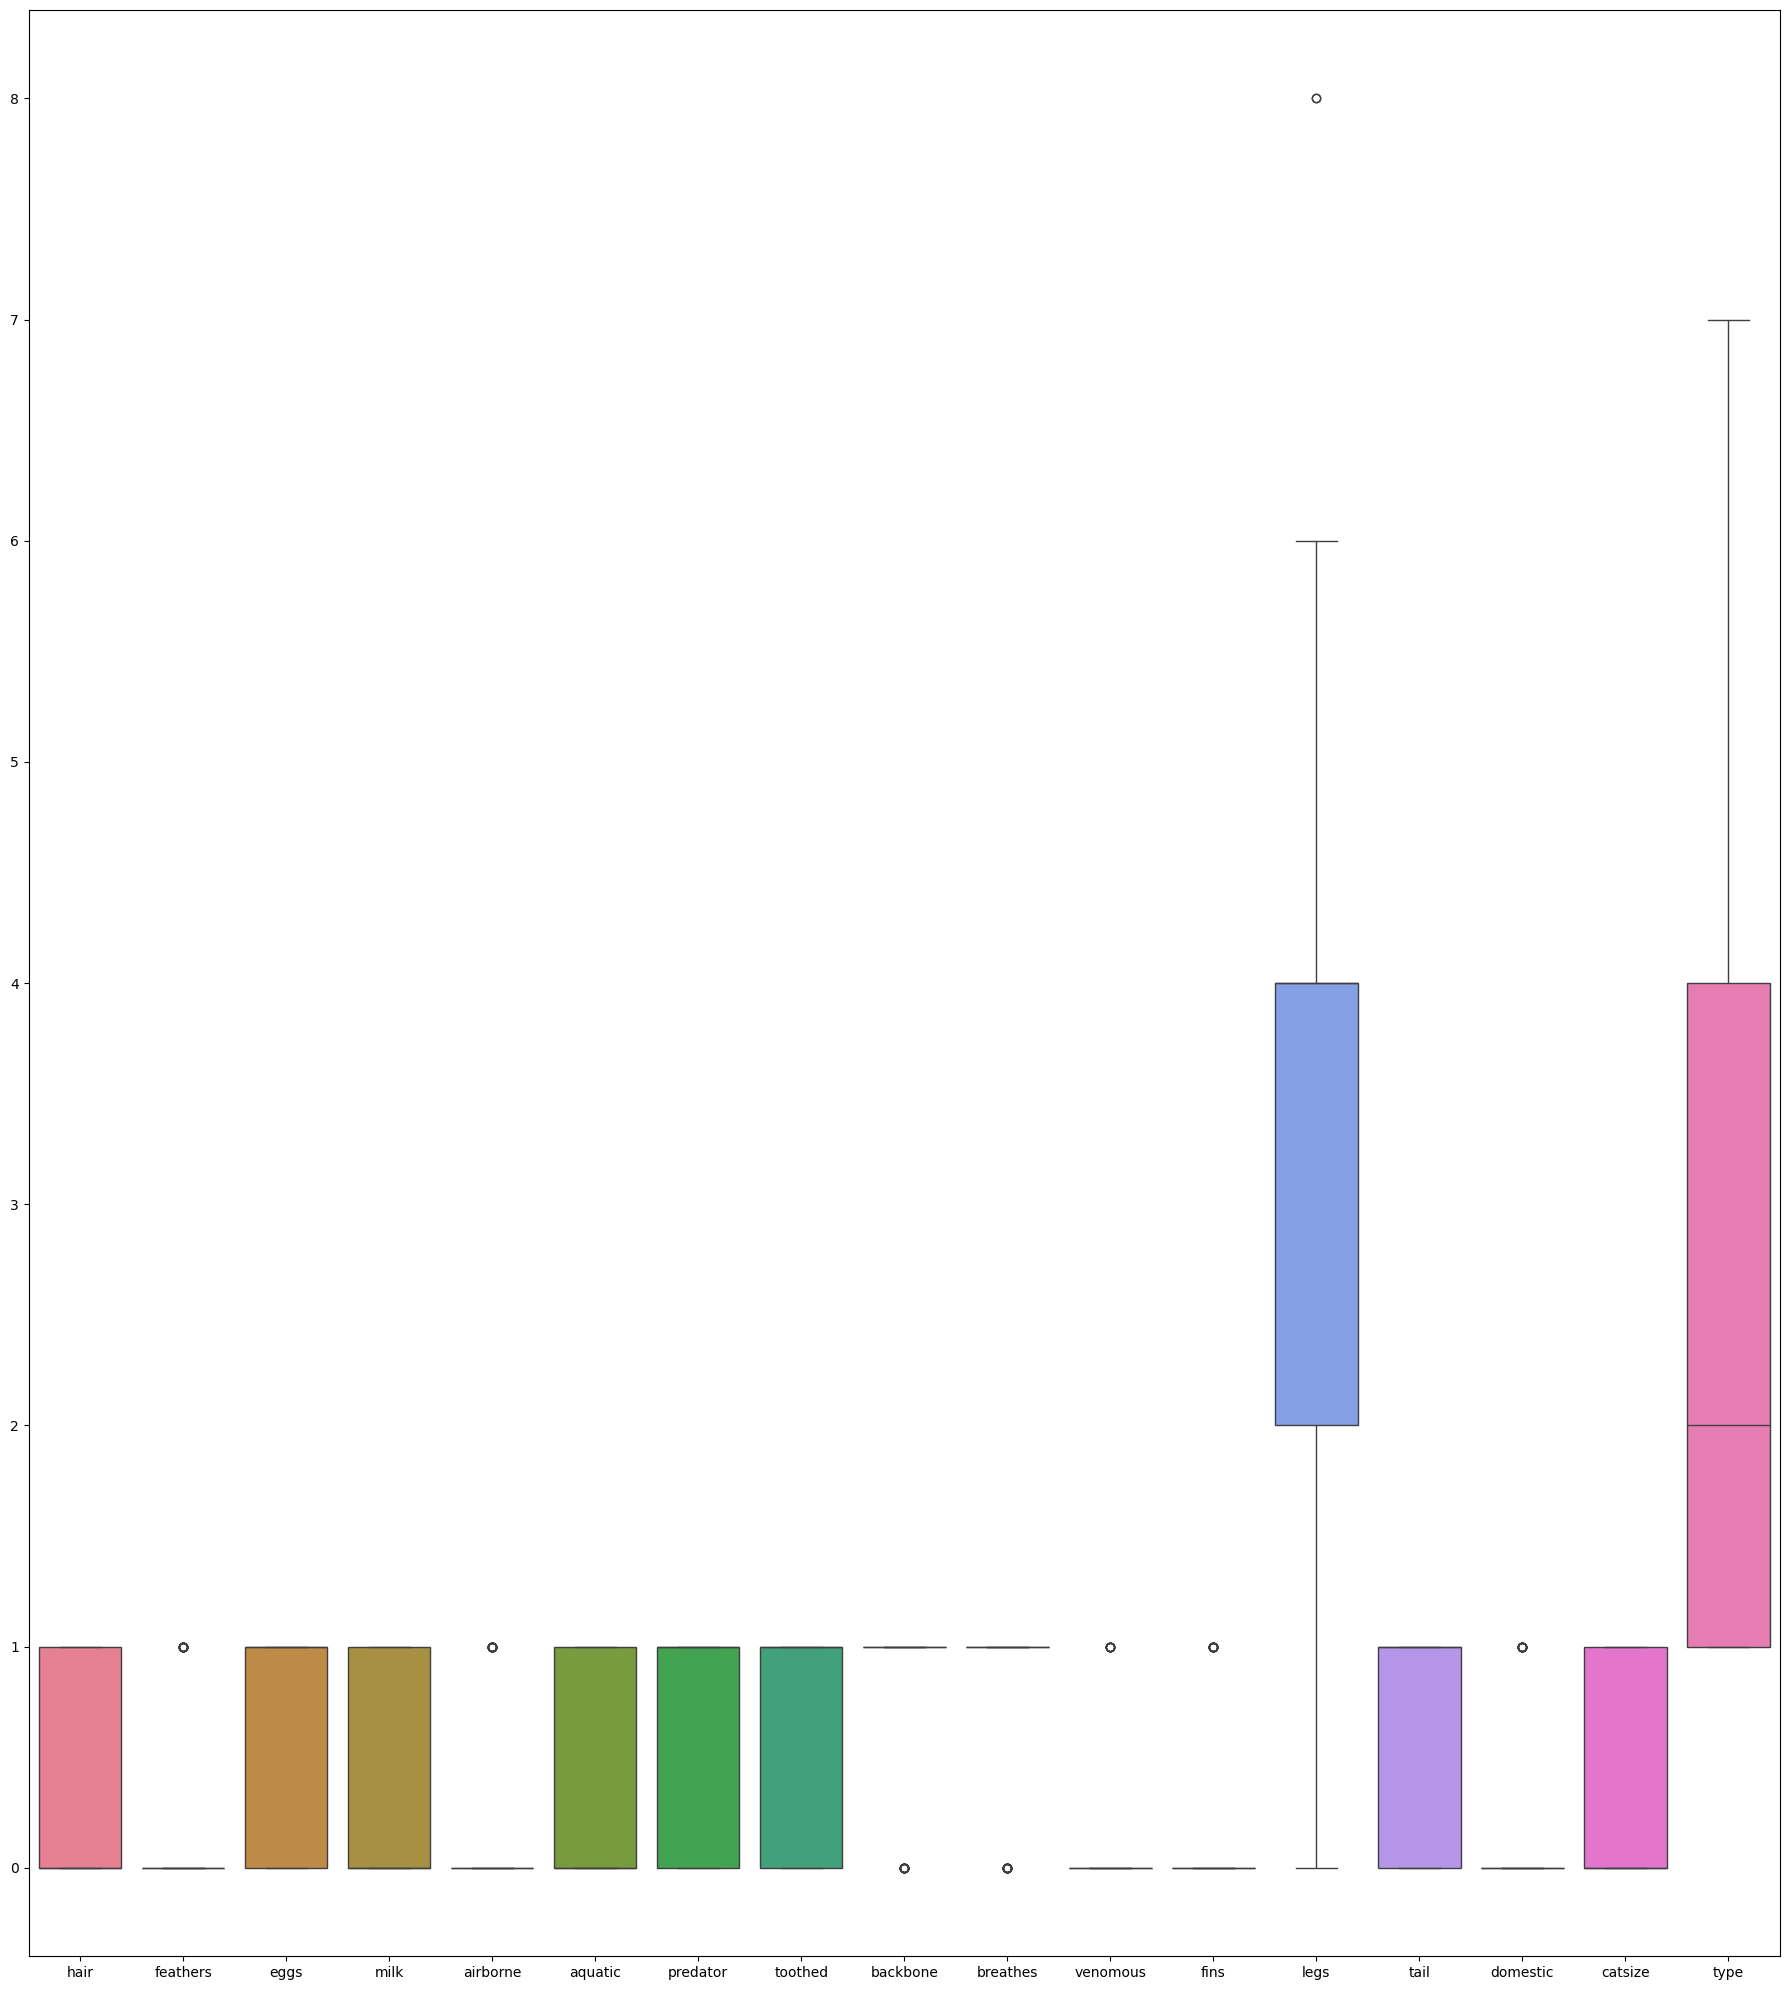

In [9]:
plt.figure(figsize=(18,20))
sns.boxplot(zd)
plt.tight_layout()


# Data Preprocessing

In [10]:
# check if there is null value
zd.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [11]:
# detecting the duplicates
duplicates=zd['animal name'].value_counts()
duplicates[duplicates >1]

animal name
frog    2
Name: count, dtype: int64

In [12]:
# checking the frog columns
frog= zd[zd['animal name']=='frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [13]:
# To change the duplicate name
zd['animal name'][(zd['venomous']==1)&(zd['animal name'] == 'frog')] = 'venomou frog'

In [14]:
zd.duplicated('animal name').sum()

0

In [15]:
# Checking if there is any outliers

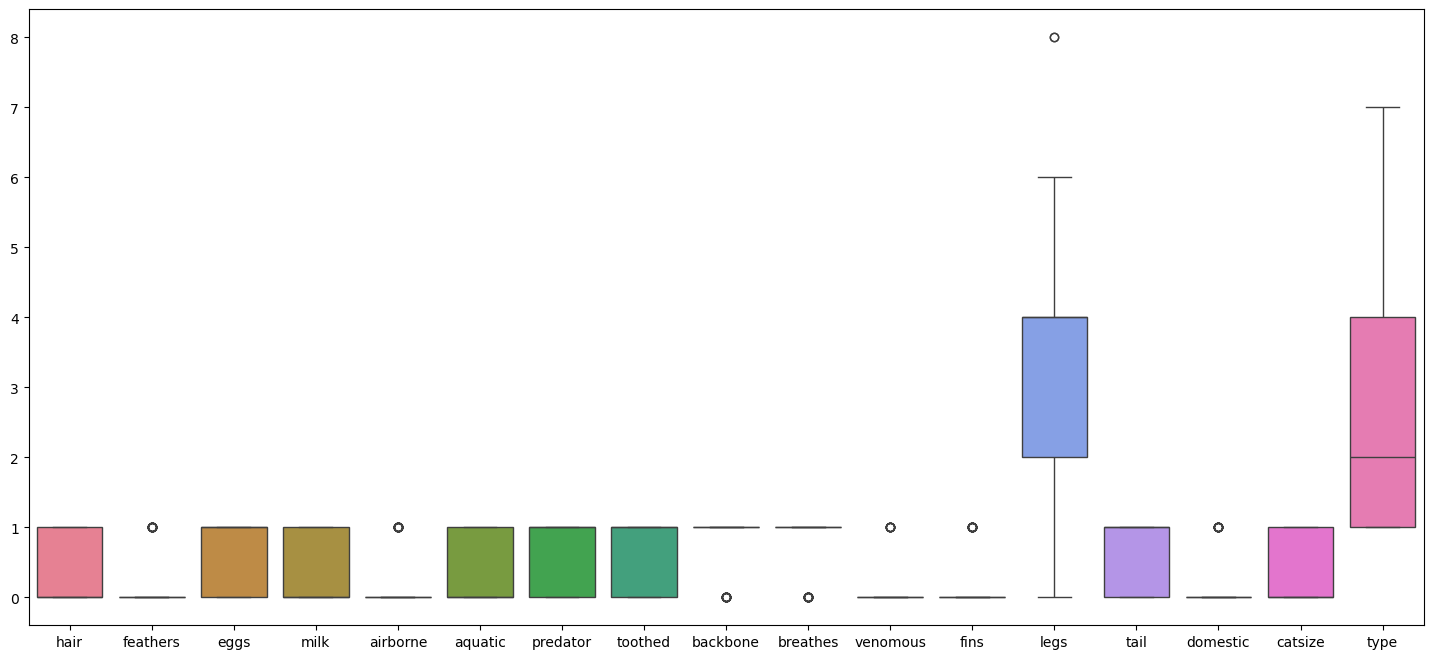

In [16]:
plt.figure(figsize=(18,8))
sns.boxplot(zd)
plt.show()

In [17]:
# Creating the function for removing the outliers using IQR technique
def outlier_Detection(zd,columns):
    for col in columns:
        Q1=zd[col].quantile(0.25)
        Q3=zd[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        zd[col]=np.where(zd[col]>upper,upper,np.where(zd[col]<lower,lower,zd[col]))
    return zd

In [18]:
# Removing the outliers
outlier_Detection(zd,['feathers','airborne','backbone','breathes','venomous','fins','domestic','legs'])

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
1,antelope,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
2,bass,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0,4
3,bear,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
4,boar,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,2.0,1,0.0,1,1
97,wasp,1,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,6.0,0,0.0,0,6
98,wolf,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
99,worm,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,7


<Axes: >

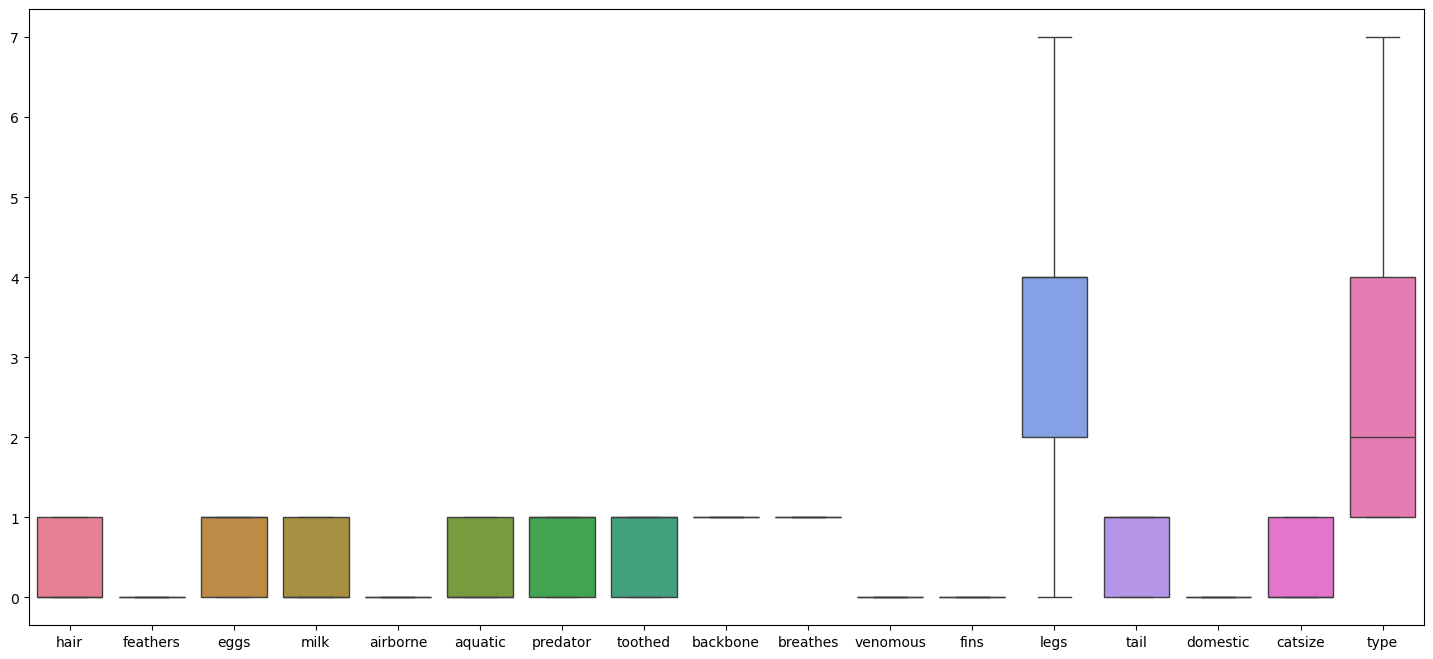

In [19]:
# Checking if the outlier is gone
plt.figure(figsize=(18,8))
sns.boxplot(zd)

# Split the dataset in train and test  

In [21]:
# conveting object into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
for columns in zd.columns:
    zd['animal name'] = label_encoder.fit_transform(zd['animal name'])

In [23]:
zd.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
1,1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
2,2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0,4
3,3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
4,4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = zd.drop(['venomous'],axis = 1)
y = zd['venomous']

In [26]:
x.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,fins,legs,tail,domestic,catsize,type
0,0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,4.0,0,0.0,1,1
1,1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,4.0,1,0.0,1,1
2,2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,1,0.0,0,4
3,3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,4.0,0,0.0,1,1
4,4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,4.0,1,0.0,1,1


In [27]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: venomous, Length: 101, dtype: float64

In [28]:
# spliting the data into train and test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.2,random_state=1)

In [29]:
xtrain.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,fins,legs,tail,domestic,catsize,type
29,28,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,2.0,0,0.0,1,1
28,27,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,4.0,1,0.0,1,1
11,11,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,2.0,1,0.0,0,2
18,18,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,1,0.0,1,4
20,20,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,2.0,1,0.0,0,2


In [30]:
ytrain.head()

29    0.0
28    0.0
11    0.0
18    0.0
20    0.0
Name: venomous, dtype: float64

## Implement the K-Nearest Neighbours algorithm

In [46]:
num_folds = 10
kfold = KFold(n_splits=10)

In [47]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x, y, cv=kfold)

In [49]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [50]:
#Predicting on test data

ypreds = model.predict(xtest) # predicting on test data set 
pd.Series(ypreds).value_counts() # getting the count of each category

0.0    81
Name: count, dtype: int64

In [51]:
model.score(xtrain,ytrain)

1.0

# Choose an appropriate distance metric and value for K.

In [41]:
from sklearn.model_selection import GridSearchCV
# Set the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],  # Values of K to test
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to test
}

In [40]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Perform GridSearchCV to find the best combination of K and distance metric
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


In [52]:

# Fit the grid search model
grid_search.fit(xtrain, ytrain)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring='accuracy')

In [43]:
# Get the best parameters and model
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_model = grid_search.best_estimator_



In [44]:
# Output the best K, distance metric, and accuracy on the test set
print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")

Best K: 1
Best Metric: euclidean


# Aplyimg the KNN algorithm for training dataset

In [33]:
# import the librayes for KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [34]:
num_folds = 10
kfold = KFold(n_splits=10)

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(knn, x, y, cv=kfold)

In [36]:
print(results.mean())

1.0


In [37]:
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        81

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



# Visualizing the CV results

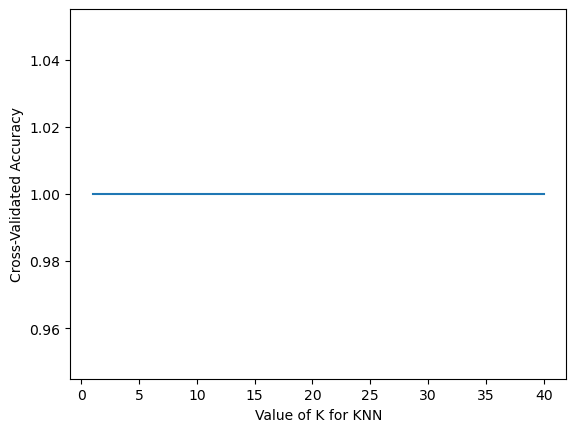

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions:

## 1. What are the key hyperparameters in KNN?
  
### 1) Number of Neighbors (k) :
Specifies how many nearest neighbors to consider for making predictions. Choosing an optimal k is crucial, as a small k can lead to overfitting, while a large k may result in underfitting.
### 2) Distance Metric:
Determines how the distance between data points is calculated. Common metrics include Euclidean, Manhattan, and Minkowski distances.
### 3) Weight Function:
Specifies whether all neighbors contribute equally to the prediction (uniform) or if closer neighbors have a greater influence (distance).
### 4) Algorithm :
Determines the method used to compute the nearest neighbors, such as brute-force search or tree-based methods like KD-Tree. Selecting an appropriate algorithm can enhance computational efficiency.
### 5) Leaf Size :
Pertains to tree-based algorithms and affects the speed of construction and query processes. Adjusting this parameter can optimize performance for large datasets.

## 2. What distance metrics can be used in KNN?

### 1) Euclidean Distance:
Calculates the straight-line distance between two points in Euclidean space. It's the most widely used distance metric in KNN.
### 2) Manhattan Distance:
Also known as L1 distance or city block distance, it computes the sum of the absolute differences between coordinates. This metric is preferred over Euclidean distance when dealing with high-dimensional data.
### 3) Minkowski Distance:
A generalized distance metric that encompasses both Euclidean and Manhattan distances, depending on the value of its parameter p. When p=2, it becomes Euclidean distance; when p=1, it becomes Manhattan distance.
### 4) Hamming Distance:
Used for categorical variables, it counts the number of positions at which corresponding elements differ. It's particularly useful for binary data.